# Day - 10
# Date - 04 June 2019
# Outcomes - 
>* understanding statistic concepts

#  

## Tasks:
* ### Create a new column which describes the number of points a player scored per game during the season. The number of total points a player scored the entire season is stored in the PTS column, and the number of games played in the Games Played column. Give the new column a relevant name.
* ### Stratify the wnba data set by player position. The Pos column describes a player's position on the field. Assign each stratum to a different variable.
* ### Loop through the strata, and for each stratum:
>* Sample 10 observations using simple random sampling (set random_state = 0).
>* Find the mean points per game using the sample. Use the new column you've created earlier.
>* Find a way to store the mean along with its corresponding position. You can use a dictionary.
* ### Find the position that has the greatest number of points per game, and assign its name to a variable named position_most_points.
>* To find the dictionary key that has the greatest dictionary value.

In [1]:
import numpy as np
import pandas as pd

def stratifedSampling(stats):
    df = pd.read_csv(stats)
    mean_strata, j = {}, 0
    
    PTS_perGame = [float('{0:.1f}'.format(df.iat[i,29]/df.iat[i,11])) for i in range(0, len(df))]
    df['PTS per Game'] = PTS_perGame
    df.to_csv(stats, index = False)
    
    position = list(np.unique(list(df['Pos'].values)))
    
    strata_C = pd.Series([df.iat[i,32] for i in range(0, len(df)) if df.iat[i,2] == 'C'])
    strata_F = pd.Series([df.iat[i,32] for i in range(0, len(df)) if df.iat[i,2] == 'F'])
    strata_FC = pd.Series([df.iat[i,32] for i in range(0, len(df)) if df.iat[i,2] == 'F/C'])
    strata_G = pd.Series([df.iat[i,32] for i in range(0, len(df)) if df.iat[i,2] == 'G'])
    strata_GF = pd.Series([df.iat[i,32] for i in range(0, len(df)) if df.iat[i,2] == 'G/F'])
    
    sample_C = strata_C.sample(n = 10, random_state = 0)
    sample_F = strata_F.sample(n = 10, random_state = 0)
    sample_FC = strata_FC.sample(n = 10, random_state = 0)
    sample_G = strata_G.sample(n = 10, random_state = 0)
    sample_GF = strata_GF.sample(n = 10, random_state = 0)
    
    sample = [list(sample_C), list(sample_F), list(sample_FC), list(sample_G), list(sample_GF)]
    
    for i in sample:
        mean_strata[position[j]] = '{0:.2f}'.format(sum(i)/len(i))
        j += 1
    
    max_mean_strata = max(mean_strata, key=mean_strata.get)
    print('Position that has the greatest number of points per game is :', max_mean_strata)
    
    return 

stratifedSampling('WNBAStats.csv')

Position that has the greatest number of points per game is : C


#      

## Tasks:
* ### Stratify the data set by the number of games played in the following way: 
>* The first strata should be composed of players that played 12 games or less
>* The second of players that played more than 12 games, but up to 22 (included)
>* The third of players that played more than 22 games (22 not included).
* ### Perform stratified sampling 100 times. For each of the 100 iterations of a *for* loop:
>* Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum.
>* random_state should vary from 0 to 99: 0 for the first iteration, 99 for the last iteration.
>* Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
>* Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.
* ### Display the entire sampling process.
>* Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis, and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
>* Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.

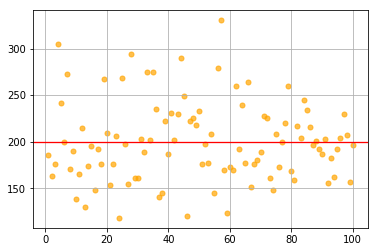

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def stratifedSampling(stats):
    df = pd.read_csv(stats)
    finalSample, sampling = [], []
    
    strata12 = pd.Series([df.iat[i,29] for i in range(0, len(df)) if df.iat[i,11] <= 12])
    strata22 = pd.Series([df.iat[i,29] for i in range(0, len(df)) if df.iat[i,11] > 12 and df.iat[i,11] <= 22])
    strata32 = pd.Series([df.iat[i,29] for i in range(0, len(df)) if df.iat[i,11] > 22])
    
    for i in range(0,100):
        sample12 = strata12.sample(n = 1, random_state = i)
        sample22 = strata22.sample(n = 2, random_state = i)
        sample32 = strata32.sample(n = 7, random_state = i)
        finalSample.append(pd.concat([sample12, sample22, sample32], ignore_index = True))
    
    sampling = [sum(i)/len(i) for i in finalSample]
    
    #scatter plot
    
    x = np.arange(1,101)  # numbers indicating 1 to 100
    y = sampling  # list of 100 means
    area = np.pi * 8   # list of random areas of circles with 10px
    plt.scatter(x, y, s = area, c = 'orange', alpha = 0.7)
    plt.axhline(y = sum(sampling)/len(sampling), linewidth = 1.3, color = 'red')
    plt.grid(True)
    plt.show()
    
    return 

stratifedSampling('WNBAStats.csv')

#  

## Tasks:
* ### Pick four team clusters randomly using the technique we've learned (use random_state = 0).
* ### Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
* ### Use the data collected to estimate the mean for the following player attributes:
>* Height
>* Age
>* BMI
>* Total points
* ### Finally, measure the sampling error of your estimates, and assign the errors to the following variables:
>* sampling_error_height
>* sampling_error_age
>* sampling_error_BMI
>* sampling_error_points

In [3]:
import pandas as pd
import numpy as np

def clusterSampling(stats):
    df = pd.read_csv(stats)
    frames = []

    teams = pd.Series(df['Team'].unique())
    team_cluster = teams.sample(n = 4, random_state = 0)
    
    for i in team_cluster:
        count = 0
        for j in range(0, len(df)):
            if df.iat[j,1] == i:
                frames.append(df.loc[j])
      
    data_frame = pd.DataFrame(frames)
    
    mean_height = sum(data_frame['Height'])/len(data_frame['Height'])
    mean_age = sum(data_frame['Age'])/len(data_frame['Age'])
    mean_BMI = sum(data_frame['BMI'])/len(data_frame['BMI'])
    mean_PTS = sum(data_frame['PTS'])/len(data_frame['PTS'])
         
    df['BMI'].fillna(0, inplace = True)
    
    error_height = (sum(df['Height'])/len(df['Height'])) - mean_height
    error_age = (sum(df['Age'])/len(df['Age'])) - mean_age
    error_BMI = (sum(df['BMI'])/len(df['BMI'])) - mean_BMI
    error_PTS = (sum(df['PTS'])/len(df['PTS'])) - mean_PTS
    
    print(error_height)
    print(error_age)
    print(error_BMI)
    print(error_PTS)
    
    return 

clusterSampling('WNBAStats.csv')

-0.06400121617511445
-1.401337792642142
0.06947741908785332
-27.79674673152934
